<a href="https://colab.research.google.com/github/psmjazz/corona_virus/blob/master/corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from google.colab import files

In [2]:
current_dir = os.getcwd()
print('current directory : ' + current_dir)
data_version = '/coronavirusdataset_20200328'
data_dir = current_dir + data_version
print('data directory : ' + data_dir)

case_table = pd.read_csv(data_dir + '/Case.csv')
p_info_table = pd.read_csv(data_dir + '/PatientInfo.csv')
p_route_table = pd.read_csv(data_dir + '/PatientRoute.csv')

current directory : /content
data directory : /content/coronavirusdataset_20200328


슈퍼 전파자 파악




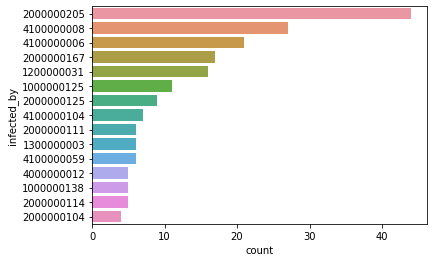

In [74]:
# spreader_count = dict()
spreader_count = None
spreader_count = p_info_table[['infected_by']]\
.dropna(axis = 0).astype('int')\
.groupby('infected_by')['infected_by'].count().reset_index(name = 'count')\
.sort_values(['count'], ascending = False)

top_15 = spreader_count.head(15)
top_15.index
spreader_chart = sns.barplot(x = 'count',y = 'infected_by',
                             data = top_15, orient = 'h',
                             order = top_15['infected_by'])